### IMPORT LIBRARIES

In [3]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [4]:
#Import the packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas_profiling as pp
pd.set_option('display.max_columns',500)
pd.set_option('display.max_rows',500)
pd.options.display.float_format = '{:.2f}'.format

### READING THE FILE AND INITIAL CHECK

In [5]:
# Read the csv file using 'read_csv'
prev_app = pd.read_csv("./case_study_statistics/previous_application.csv")

In [6]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,0.00,17145.00,SATURDAY,15,Y,1,0.00,0.18,0.87,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,nan,607500.00,THURSDAY,11,Y,1,nan,nan,nan,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,nan,112500.00,TUESDAY,11,Y,1,nan,nan,nan,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,nan,450000.00,MONDAY,7,Y,1,nan,nan,nan,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,nan,337500.00,THURSDAY,9,Y,1,nan,nan,nan,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


Inspect the structure -Describe and Shape

In [7]:
prev_app.shape

(1670214, 37)

In [8]:
prev_app.describe()

,SK_ID_PREV,SK_ID_CURR,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,HOUR_APPR_PROCESS_START,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
count,1670214.00,1670214.00,1297979.00,1670214.00,1670213.00,774370.00,1284699.00,1670214.00,1670214.00,774370.00,5951.00,5951.00,1670214.00,1670214.00,1297984.00,997149.00,997149.00,997149.00,997149.00,997149.00,997149.00
mean,1923089.14,278357.17,15955.12,175233.86,196114.02,6697.40,227847.28,12.48,1.00,0.08,0.19,0.77,-880.68,313.95,16.05,342209.86,13826.27,33767.77,76582.40,81992.34,0.33
std,532597.96,102814.82,14782.14,292779.76,318574.62,20921.50,315396.56,3.33,0.06,0.11,0.09,0.10,779.10,7127.44,14.57,88916.12,72444.87,106857.03,149647.42,153303.52,0.47
min,1000001.00,100001.00,0.00,0.00,0.00,-0.90,0.00,0.00,0.00,-0.00,0.03,0.37,-2922.00,-1.00,0.00,-2922.00,-2892.00,-2801.00,-2889.00,-2874.00,0.00
25%,1461857.25,189329.00,6321.78,18720.00,24160.50,0.00,50841.00,10.00,1.00,0.00,0.16,0.72,-1300.00,-1.00,6.00,365243.00,-1628.00,-1242.00,-1314.00,-1270.00,0.00
50%,1923110.50,278714.50,11250.00,71046.00,80541.00,1638.00,112320.00,12.00,1.00,0.05,0.19,0.84,-581.00,3.00,12.00,365243.00,-831.00,-361.00,-537.00,-499.00,0.00
75%,2384279.75,367514.00,20658.42,180360.00,216418.50,7740.00,234000.00,15.00,1.00,0.11,0.19,0.85,-280.00,82.00,24.00,365243.00,-411.00,129.00,-74.00,-44.00,1.00
max,2845382.00,456255.00,418058.15,6905160.00,6905160.00,3060045.00,6905160.00,23.00,1.00,1.00,1.00,1.00,-1.00,4000000.00,84.00,365243.00,365243.00,365243.00,365243.00,365243.00,1.00


### MISSING VALUES - DATA CLEANING

In [9]:
#Columnwise count and percntage of missing values
#This helps us in removing unnecessary columns.
total = prev_app.isnull().sum().sort_values(ascending=False)
perc  = ((prev_app.isnull().sum()/prev_app.isnull().count())*100).sort_values(ascending=False)
pd.concat([total,perc],axis=1,keys=['Total','Perc']).transpose()

,RATE_INTEREST_PRIVILEGED,RATE_INTEREST_PRIMARY,RATE_DOWN_PAYMENT,AMT_DOWN_PAYMENT,NAME_TYPE_SUITE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,AMT_GOODS_PRICE,AMT_ANNUITY,CNT_PAYMENT,PRODUCT_COMBINATION,AMT_CREDIT,SK_ID_CURR,NAME_CONTRACT_TYPE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,AMT_APPLICATION,NAME_PAYMENT_TYPE,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,NAME_YIELD_GROUP,SK_ID_PREV
Total,1664263.00,1664263.00,895844.00,895844.00,820405.00,673065.00,673065.00,673065.00,673065.00,673065.00,673065.00,385515.00,372235.00,372230.00,346.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Perc,99.64,99.64,53.64,53.64,49.12,40.30,40.30,40.30,40.30,40.30,40.30,23.08,22.29,22.29,0.02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [10]:
#Converting the Pandas series to Dataframe
perc2 = pd.DataFrame(perc).transpose()
#Listing all the column names of the DF.
list1 = list(perc2.columns.values)

In [11]:
#For initial drop of columns, we can keep a percentage limit.
#Here I could find many columns are having hugh percentage of missing values. So keeping 49% as kind of threshold.
list_to_drop=[]
for i in list1:
    if perc[i] > 49:
        list_to_drop.append(i)
list_to_drop   

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT',
 'NAME_TYPE_SUITE']

We are going to drop all those columns which are having high percentage of Null values like RATE_INTEREST_PRIVILEGED and RATE_INTEREST_PRIMARY. Also since the columns RATE_DOWN_PAYMENT and AMT_DOWN_PAYMENT are having more than 50% of null values, imputing them won't be a good choice since it will impact the overall status. NAME_TYPE_SUITE which is having 49% can also be dropped since it won't be much of an important column for analysis here after. 

In [12]:
prev_app = prev_app.drop(list_to_drop,axis=1)
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,nan,nan,nan,nan,nan,nan


In [13]:
prev_app.shape

(1670214, 32)

In [14]:
# Get the column-wise Null count using 'is.null()' alongwith the 'sum()' function
prev_app.isnull().sum().sort_values(ascending=False)

NFLAG_INSURED_ON_APPROVAL      673065
DAYS_LAST_DUE                  673065
DAYS_LAST_DUE_1ST_VERSION      673065
DAYS_FIRST_DUE                 673065
DAYS_FIRST_DRAWING             673065
DAYS_TERMINATION               673065
AMT_GOODS_PRICE                385515
AMT_ANNUITY                    372235
CNT_PAYMENT                    372230
PRODUCT_COMBINATION               346
AMT_CREDIT                          1
WEEKDAY_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT         0
HOUR_APPR_PROCESS_START             0
NAME_CONTRACT_TYPE                  0
AMT_APPLICATION                     0
NAME_CASH_LOAN_PURPOSE              0
SK_ID_CURR                          0
NFLAG_LAST_APPL_IN_DAY              0
CODE_REJECT_REASON                  0
NAME_CONTRACT_STATUS                0
DAYS_DECISION                       0
NAME_PAYMENT_TYPE                   0
NAME_CLIENT_TYPE                    0
NAME_GOODS_CATEGORY                 0
NAME_PORTFOLIO                      0
NAME_PRODUCT

In [15]:
#prev_app = prev_app[prev_app.isnull().sum(axis=1) <= 5]
#prev_app.isnull().sum().sort_values(ascending=False)

In [16]:
#prev_app.shape

In [17]:
#prev_app = prev_app.loc[prev_app['AMT_GOODS_PRICE'].isnull() !=True]

In [18]:
#prev_app.shape

In [19]:
#(prev_app.shape[0]/1670214)*100

In [20]:
100*(len(prev_app[prev_app.isnull().sum(axis=1) > 5].index) / len(prev_app.index))

40.29812946125467

From above we can find that there are still many missing values for the columns such as NFLAG_INSURED_ON_APPROVAL,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_FIRST_DUE,DAYS_FIRST_DRAWING,DAYS_TERMINATION.
Dropping the rows where these columns are having null values result in loss of too much of data. Some of this columns might also be helpful and hence not dropping the columns as well as dropping the rows. Also since imputing with standard measures can introduce a bias here and would be inappropriate, we can impute the missing values with 0.

In [23]:
prev_app.loc[pd.isnull(prev_app['NFLAG_INSURED_ON_APPROVAL']), ['NFLAG_INSURED_ON_APPROVAL']] = 0
prev_app.loc[pd.isnull(prev_app['DAYS_LAST_DUE']), ['DAYS_LAST_DUE']] = 0
prev_app.loc[pd.isnull(prev_app['DAYS_LAST_DUE_1ST_VERSION']), ['DAYS_LAST_DUE_1ST_VERSION']] = 0
prev_app.loc[pd.isnull(prev_app['DAYS_FIRST_DUE']), ['DAYS_FIRST_DUE']] = 0
prev_app.loc[pd.isnull(prev_app['DAYS_FIRST_DRAWING']), ['DAYS_FIRST_DRAWING']] = 0
prev_app.loc[pd.isnull(prev_app['DAYS_TERMINATION']), ['DAYS_TERMINATION']] = 0
prev_app.loc[pd.isnull(prev_app['AMT_GOODS_PRICE']), ['AMT_GOODS_PRICE']] = 0
prev_app.loc[pd.isnull(prev_app['AMT_ANNUITY']), ['AMT_ANNUITY']] = 0
prev_app.loc[pd.isnull(prev_app['CNT_PAYMENT']), ['CNT_PAYMENT']] = 0

In [24]:
prev_app.isnull().sum().sort_values(ascending=False)

PRODUCT_COMBINATION            346
AMT_CREDIT                       1
NFLAG_INSURED_ON_APPROVAL        0
NAME_PAYMENT_TYPE                0
SK_ID_CURR                       0
NAME_CONTRACT_TYPE               0
AMT_ANNUITY                      0
AMT_APPLICATION                  0
AMT_GOODS_PRICE                  0
WEEKDAY_APPR_PROCESS_START       0
HOUR_APPR_PROCESS_START          0
FLAG_LAST_APPL_PER_CONTRACT      0
NFLAG_LAST_APPL_IN_DAY           0
NAME_CASH_LOAN_PURPOSE           0
NAME_CONTRACT_STATUS             0
DAYS_DECISION                    0
CODE_REJECT_REASON               0
DAYS_TERMINATION                 0
NAME_CLIENT_TYPE                 0
NAME_GOODS_CATEGORY              0
NAME_PORTFOLIO                   0
NAME_PRODUCT_TYPE                0
CHANNEL_TYPE                     0
SELLERPLACE_AREA                 0
NAME_SELLER_INDUSTRY             0
CNT_PAYMENT                      0
NAME_YIELD_GROUP                 0
DAYS_FIRST_DRAWING               0
DAYS_FIRST_DUE      

**Dataset Ready!!!!!**

In [29]:
prev_app.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.43,17145.00,17145.00,17145.00,SATURDAY,15,Y,1,XAP,Approved,-73,Cash through the bank,XAP,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.00,middle,POS mobile with interest,365243.00,-42.00,300.00,-42.00,-37.00,0.00
1,2802425,108129,Cash loans,25188.62,607500.00,679671.00,607500.00,THURSDAY,11,Y,1,XNA,Approved,-164,XNA,XAP,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.00,low_action,Cash X-Sell: low,365243.00,-134.00,916.00,365243.00,365243.00,1.00
2,2523466,122040,Cash loans,15060.74,112500.00,136444.50,112500.00,TUESDAY,11,Y,1,XNA,Approved,-301,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,high,Cash X-Sell: high,365243.00,-271.00,59.00,365243.00,365243.00,1.00
3,2819243,176158,Cash loans,47041.33,450000.00,470790.00,450000.00,MONDAY,7,Y,1,XNA,Approved,-512,Cash through the bank,XAP,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.00,middle,Cash X-Sell: middle,365243.00,-482.00,-152.00,-182.00,-177.00,1.00
4,1784265,202054,Cash loans,31924.40,337500.00,404055.00,337500.00,THURSDAY,9,Y,1,Repairs,Refused,-781,Cash through the bank,HC,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.00,high,Cash Street: high,0.00,0.00,0.00,0.00,0.00,0.00


In [30]:
prev_app['NAME_CONTRACT_TYPE'].unique() 

array(['Consumer loans', 'Cash loans', 'Revolving loans', 'XNA'],
      dtype=object)

So different Loan types include-
-  Consumer Loans
-  Cash Loans
-  Revolving Loans

In [32]:
#Different Interest Rate groups present in the dataset
prev_app['NAME_YIELD_GROUP'].unique()

array(['middle', 'low_action', 'high', 'low_normal', 'XNA'], dtype=object)

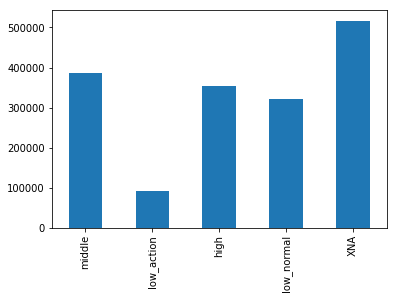

In [33]:
from collections import Counter
count_group=Counter(prev_app['NAME_YIELD_GROUP'])
count_df = pd.DataFrame.from_dict(count_group, orient='index')
count_df.plot(kind='bar',legend=False)
plt.show()

Ignoring the XNA category values, we can find Interest rate groups are usually high or in middle category. Low-action Interest rate group is less.

Density Plot for the application amount as requested by the client and the Credited amount as for the requested application

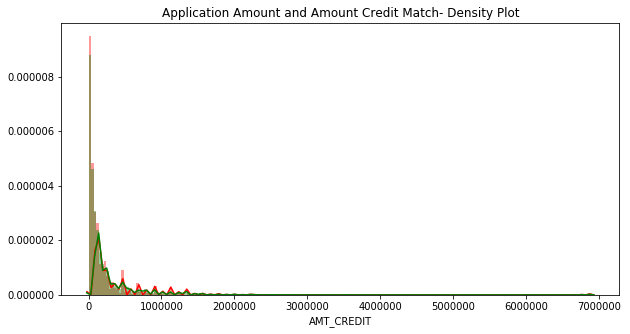

In [46]:
plt.figure(figsize = (10,5))
plt.title('Application Amount and Amount Credit Match- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(prev_app['AMT_APPLICATION'],kde=True,bins=200, color="red")
sns.distplot(prev_app['AMT_CREDIT'],kde=True,bins=200, color="green")
plt.show()

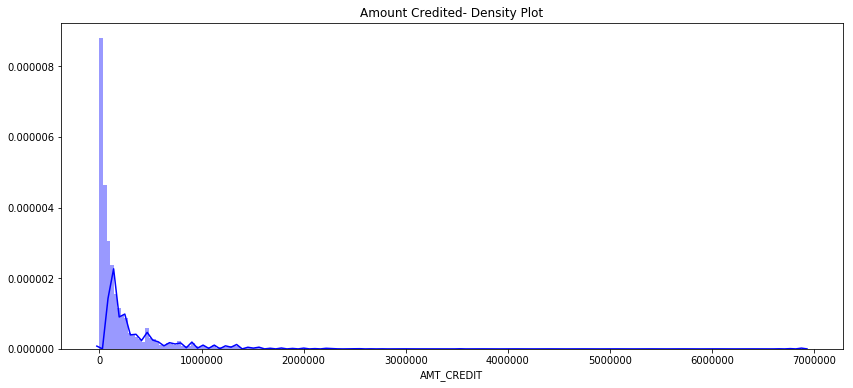

In [42]:
plt.figure(figsize = (14,6))
plt.title('Amount Credited- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(prev_app['AMT_CREDIT'],kde=True,bins=200, color="blue")
plt.show()

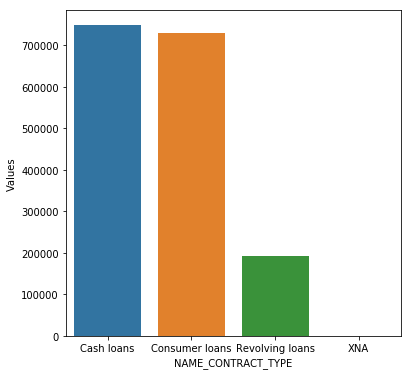

In [48]:
temp = prev_app["NAME_CONTRACT_TYPE"].value_counts()
df2 = pd.DataFrame({'NAME_CONTRACT_TYPE': temp.index,'Values': temp.values})
plt.figure(figsize = (6,6))
#plt.title('Data Imbalance\n (Client with Payment difficulties=1,All others=0)')
sns.barplot(x = 'NAME_CONTRACT_TYPE', y="Values", data=df2)
locs, labels = plt.xticks()
plt.show()

In [49]:
curr = prev_app[["AMT_ANNUITY", "AMT_APPLICATION","AMT_CREDIT","AMT_GOODS_PRICE"]]
cor = curr.corr()
round(cor, 3)

,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_GOODS_PRICE
AMT_ANNUITY,1.00,0.82,0.83,0.82
AMT_APPLICATION,0.82,1.00,0.98,1.00
AMT_CREDIT,0.83,0.98,1.00,0.98
AMT_GOODS_PRICE,0.82,1.00,0.98,1.00


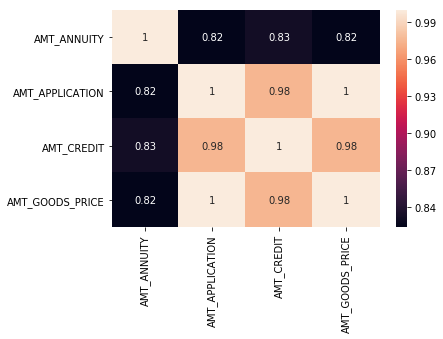

In [50]:
sns.heatmap(cor,annot=True)
plt.show()

As expected, the Goods Price Amount,Amount Annuity,Application Amount and the Credit Amount are all highly correlated with each there. There is no exception found from the above Heat map.

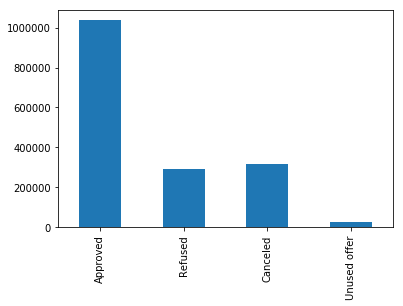

In [51]:
from collections import Counter
count_group=Counter(prev_app['NAME_CONTRACT_STATUS'])
count_df = pd.DataFrame.from_dict(count_group, orient='index')
count_df.plot(kind='bar',legend=False)
plt.show()

In [52]:
prev_app_refused = prev_app.loc[prev_app['NAME_CONTRACT_STATUS'] == 'Refused']

In [54]:
prev_app_refused.shape[0]

290678

Hence 2.9 Lakh of the client applications where refused by the company for Loan out of the 16.7 Lakh applications recieved.

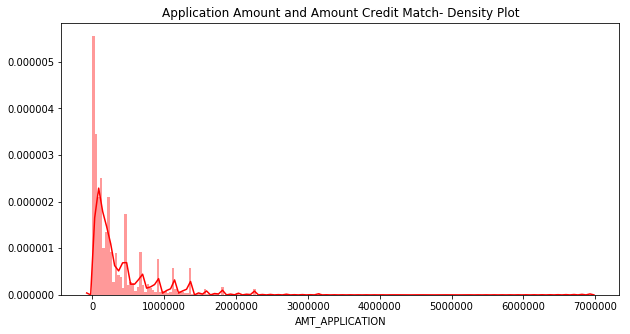

In [57]:
plt.figure(figsize = (10,5))
plt.title('Application Amount Requested by the Refused applcants- Density Plot')
sns.set_color_codes("pastel")
sns.distplot(prev_app_refused['AMT_APPLICATION'],kde=True,bins=200, color="red")
plt.show()

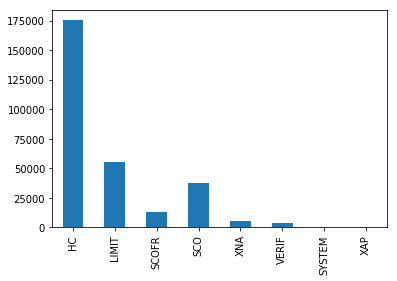

In [58]:
from collections import Counter
count_group=Counter(prev_app_refused['CODE_REJECT_REASON'])
count_df = pd.DataFrame.from_dict(count_group, orient='index')
count_df.plot(kind='bar',legend=False)
plt.show()

From the Rejected appplicants, the Reject Reason for most of the applicants is HC and LIMIT.

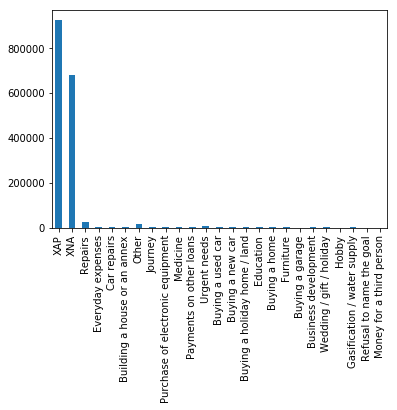

In [59]:
from collections import Counter
count_group=Counter(prev_app['NAME_CASH_LOAN_PURPOSE'])
count_df = pd.DataFrame.from_dict(count_group, orient='index')
count_df.plot(kind='bar',legend=False)
plt.show()

In [60]:
prev_app['CHANNEL_TYPE'].unique()

array(['Country-wide', 'Contact center', 'Credit and cash offices',
       'Stone', 'Regional / Local', 'AP+ (Cash loan)',
       'Channel of corporate sales', 'Car dealer'], dtype=object)

### OUTLIER DETECTION

In [1]:
plt.figure(figsize=(6,6))
sns.boxplot(y='AMT_APPLICATION',data=prev_app)
#plt.yscale('log')
plt.show()

NameError: name 'plt' is not defined

From the above Boxplot we can find many outliers are present with respect to the Application amount requested by the client, with one application standing out with almost 70Lakh as requested amount. Also it is clear that a major part of the Requested amounts are actually maybe less than 5Lakhs.

In [68]:
prev_app.loc[prev_app['NFLAG_LAST_APPL_IN_DAY'] != 1].shape

(5900, 32)

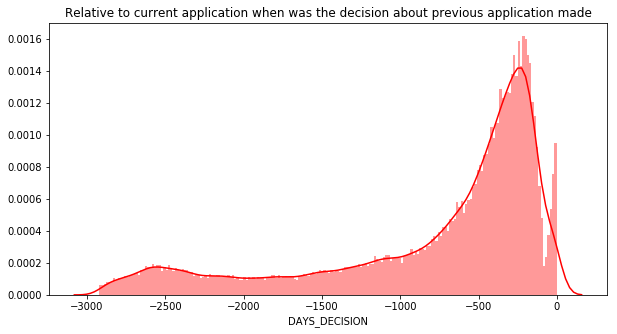

In [71]:
plt.figure(figsize = (10,5))
plt.title('Relative to current application when was the decision about previous application made')
sns.set_color_codes("pastel")
sns.distplot(prev_app_refused['DAYS_DECISION'],kde=True,bins=200, color="red")
plt.show()

From the above Plot we can find that most of the current applicants whose previous application was rejected as reapplied for a Loan within a minimum of 500 days and many number of poeple have reapplied the day their previous application was rejeted itself.

Days Decision can be taken as an important category while lending out loans for the applicants.

In [76]:
refused_days_less_thanyear = prev_app_refused.loc[prev_app_refused['DAYS_DECISION'] >= -100]

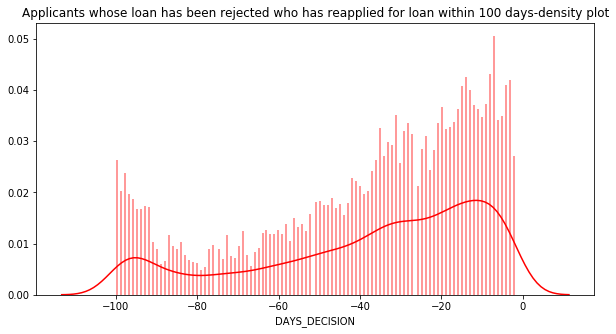

In [78]:
plt.figure(figsize = (10,5))
plt.title('Applicants whose loan has been rejected who has reapplied for loan within 100 days-density plot')
sns.set_color_codes("pastel")
sns.distplot(refused_days_less_thanyear['DAYS_DECISION'],kde=True,bins=200, color="red")
plt.show()

In [79]:
refused_days_less_thanyear['AMT_APPLICATION'].mean()

499887.0282279902

In [80]:
refused_days_less_thanyear['NAME_CASH_LOAN_PURPOSE'].unique()

array(['Building a house or an annex', 'XNA', 'XAP', 'Repairs',
       'Payments on other loans', 'Education', 'Buying a used car',
       'Buying a new car', 'Buying a holiday home / land', 'Furniture',
       'Buying a home', 'Purchase of electronic equipment', 'Other',
       'Medicine', 'Wedding / gift / holiday', 'Urgent needs', 'Journey',
       'Car repairs', 'Everyday expenses', 'Hobby',
       'Gasification / water supply', 'Business development',
       'Buying a garage'], dtype=object)

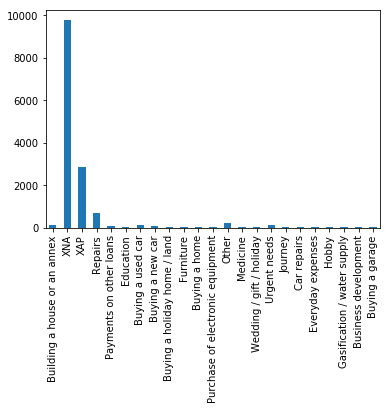

In [81]:
from collections import Counter
count_refused=Counter(refused_days_less_thanyear['NAME_CASH_LOAN_PURPOSE'])
count_df1 = pd.DataFrame.from_dict(count_refused, orient='index')
count_df1.plot(kind='bar',legend=False)
plt.show()

Out of Applicants who have reapplied for loan within 100 days of their previous application being rejected,most of the applicants haven't cited any reason/Purpose for their loan.

In [93]:
(refused_days_less_thanyear.loc[refused_days_less_thanyear['NAME_CASH_LOAN_PURPOSE']== 'XNA']['NAME_CASH_LOAN_PURPOSE']).count()

9763

In [94]:
refused_days_less_thanyear['NAME_CASH_LOAN_PURPOSE'].count()

14255

In [99]:
round((9763/14255)*100,2)

68.49

Almost 68% of the people as mentioned above as not stated purpose for the Loan. It would be a good practice for the bank to take note of such cases and be cautious in lending loans to such applicants.